In [1]:
import script as sr

C:\Users\82106\miniconda3\envs\tf24\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
HEIGHT, WIDTH, CHANNEL = 512, 512, 3
#X_train - >BGR2HSV
X_train = sr.imagePrep('data/train/*', WIDTH, HEIGHT, CHANNEL)
X_test = sr.imagePrep('data/test/*', WIDTH, HEIGHT, CHANNEL)

#Y_train -> BGR2GRAY 
Y_train = sr.imagePrep('data/target/*', WIDTH, HEIGHT, 1)

print(X_train.shape, X_train.dtype)
print(X_test.shape, X_test.dtype)
print(Y_train.shape, Y_train.dtype)

['C:\\Users\\82106\\tf24\\data\\train\\1-1.png', 'C:\\Users\\82106\\tf24\\data\\train\\1-2.png', 'C:\\Users\\82106\\tf24\\data\\train\\1-3.png', 'C:\\Users\\82106\\tf24\\data\\train\\1.png', 'C:\\Users\\82106\\tf24\\data\\train\\10-1.png', 'C:\\Users\\82106\\tf24\\data\\train\\10-2.png', 'C:\\Users\\82106\\tf24\\data\\train\\10-3.png', 'C:\\Users\\82106\\tf24\\data\\train\\10.png', 'C:\\Users\\82106\\tf24\\data\\train\\11-1.png', 'C:\\Users\\82106\\tf24\\data\\train\\11-2.png']
end
['C:\\Users\\82106\\tf24\\data\\train\\1-1.png', 'C:\\Users\\82106\\tf24\\data\\train\\1-2.png', 'C:\\Users\\82106\\tf24\\data\\train\\1-3.png', 'C:\\Users\\82106\\tf24\\data\\train\\1.png', 'C:\\Users\\82106\\tf24\\data\\train\\2-1.png', 'C:\\Users\\82106\\tf24\\data\\train\\2-2.png', 'C:\\Users\\82106\\tf24\\data\\train\\2-3.png', 'C:\\Users\\82106\\tf24\\data\\train\\2.png', 'C:\\Users\\82106\\tf24\\data\\train\\3-1.png', 'C:\\Users\\82106\\tf24\\data\\train\\3-2.png']
['C:\\Users\\82106\\tf24\\data\\test

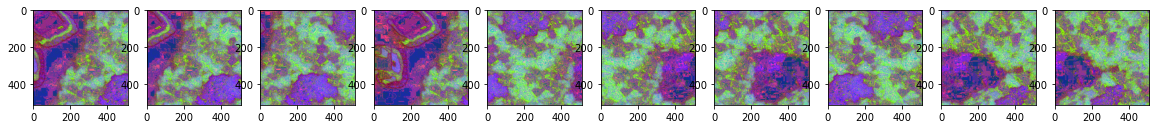

In [3]:
fig = sr.imageVis(X_train ,WIDTH, HEIGHT,CHANNEL)

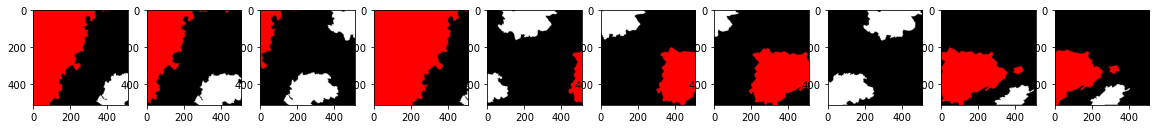

In [4]:
fig = sr.imageVis(Y_train ,WIDTH, HEIGHT,3)

In [5]:
#결과 값이 GRAY img
model = sr.get_model((WIDTH, HEIGHT),3)

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

 max_pooling2d_2 (MaxPooling2D)  (None, 32, 32, 256)  0          ['batch_normalization_6[0][0]']  
                                                                                                  
 conv2d_3 (Conv2D)              (None, 32, 32, 256)  33024       ['add_1[0][0]']                  
                                                                                                  
 add_2 (Add)                    (None, 32, 32, 256)  0           ['max_pooling2d_2[0][0]',        
                                                                  'conv2d_3[0][0]']               
                                                                                                  
 activation_7 (Activation)      (None, 32, 32, 256)  0           ['add_2[0][0]']                  
                                                                                                  
 conv2d_transpose (Conv2DTransp  (None, 32, 32, 256)  590080     ['activation_7[0][0]']           
 ose)     

                                                                                                  
 conv2d_6 (Conv2D)              (None, 256, 256, 64  8256        ['up_sampling2d_5[0][0]']        
                                )                                                                 
                                                                                                  
 add_5 (Add)                    (None, 256, 256, 64  0           ['up_sampling2d_4[0][0]',        
                                )                                 'conv2d_6[0][0]']               
                                                                                                  
 activation_13 (Activation)     (None, 256, 256, 64  0           ['add_5[0][0]']                  
                                )                                                                 
                                                                                                  
 conv2d_tr

In [ ]:
# #모델 학습부분

# #모델 저장 폴더 설정
# import tensorflow as tf
# import os

# MODEL_DIR = './model/'
# if not os.path.exists(MODEL_DIR):
#     os.mkdir(MODEL_DIR)

# tf.debugging.set_log_device_placement(False)

# with tf.device('/CPU:0'):
#     #모델 저장 조건 설정
#     from tensorflow.keras.callbacks import ModelCheckpoint
#     modelpath = './model/{epoch:02d}-{accuracy:.4f}.hdf5'

#     #모델 업데이트 및 저장
#     checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'accuracy', 
#                                   verbose = 1, save_best_only = False)

#     model.compile(optimizer='adam', loss='binary_crossentropy' ,metrics=['accuracy'])
#     model.fit(X_train, Y_train, epochs=800, batch_size=2, validation_data=(X_train, Y_train), callbacks = [checkpointer])

In [ ]:
# #GPU_limit
# import tensorflow as tf
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
#   try:
#     tf.config.experimental.set_virtual_device_configuration(
#         gpus[0], 
#         [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Virtual devices must be set before GPUs have been initialized
#     print(e)

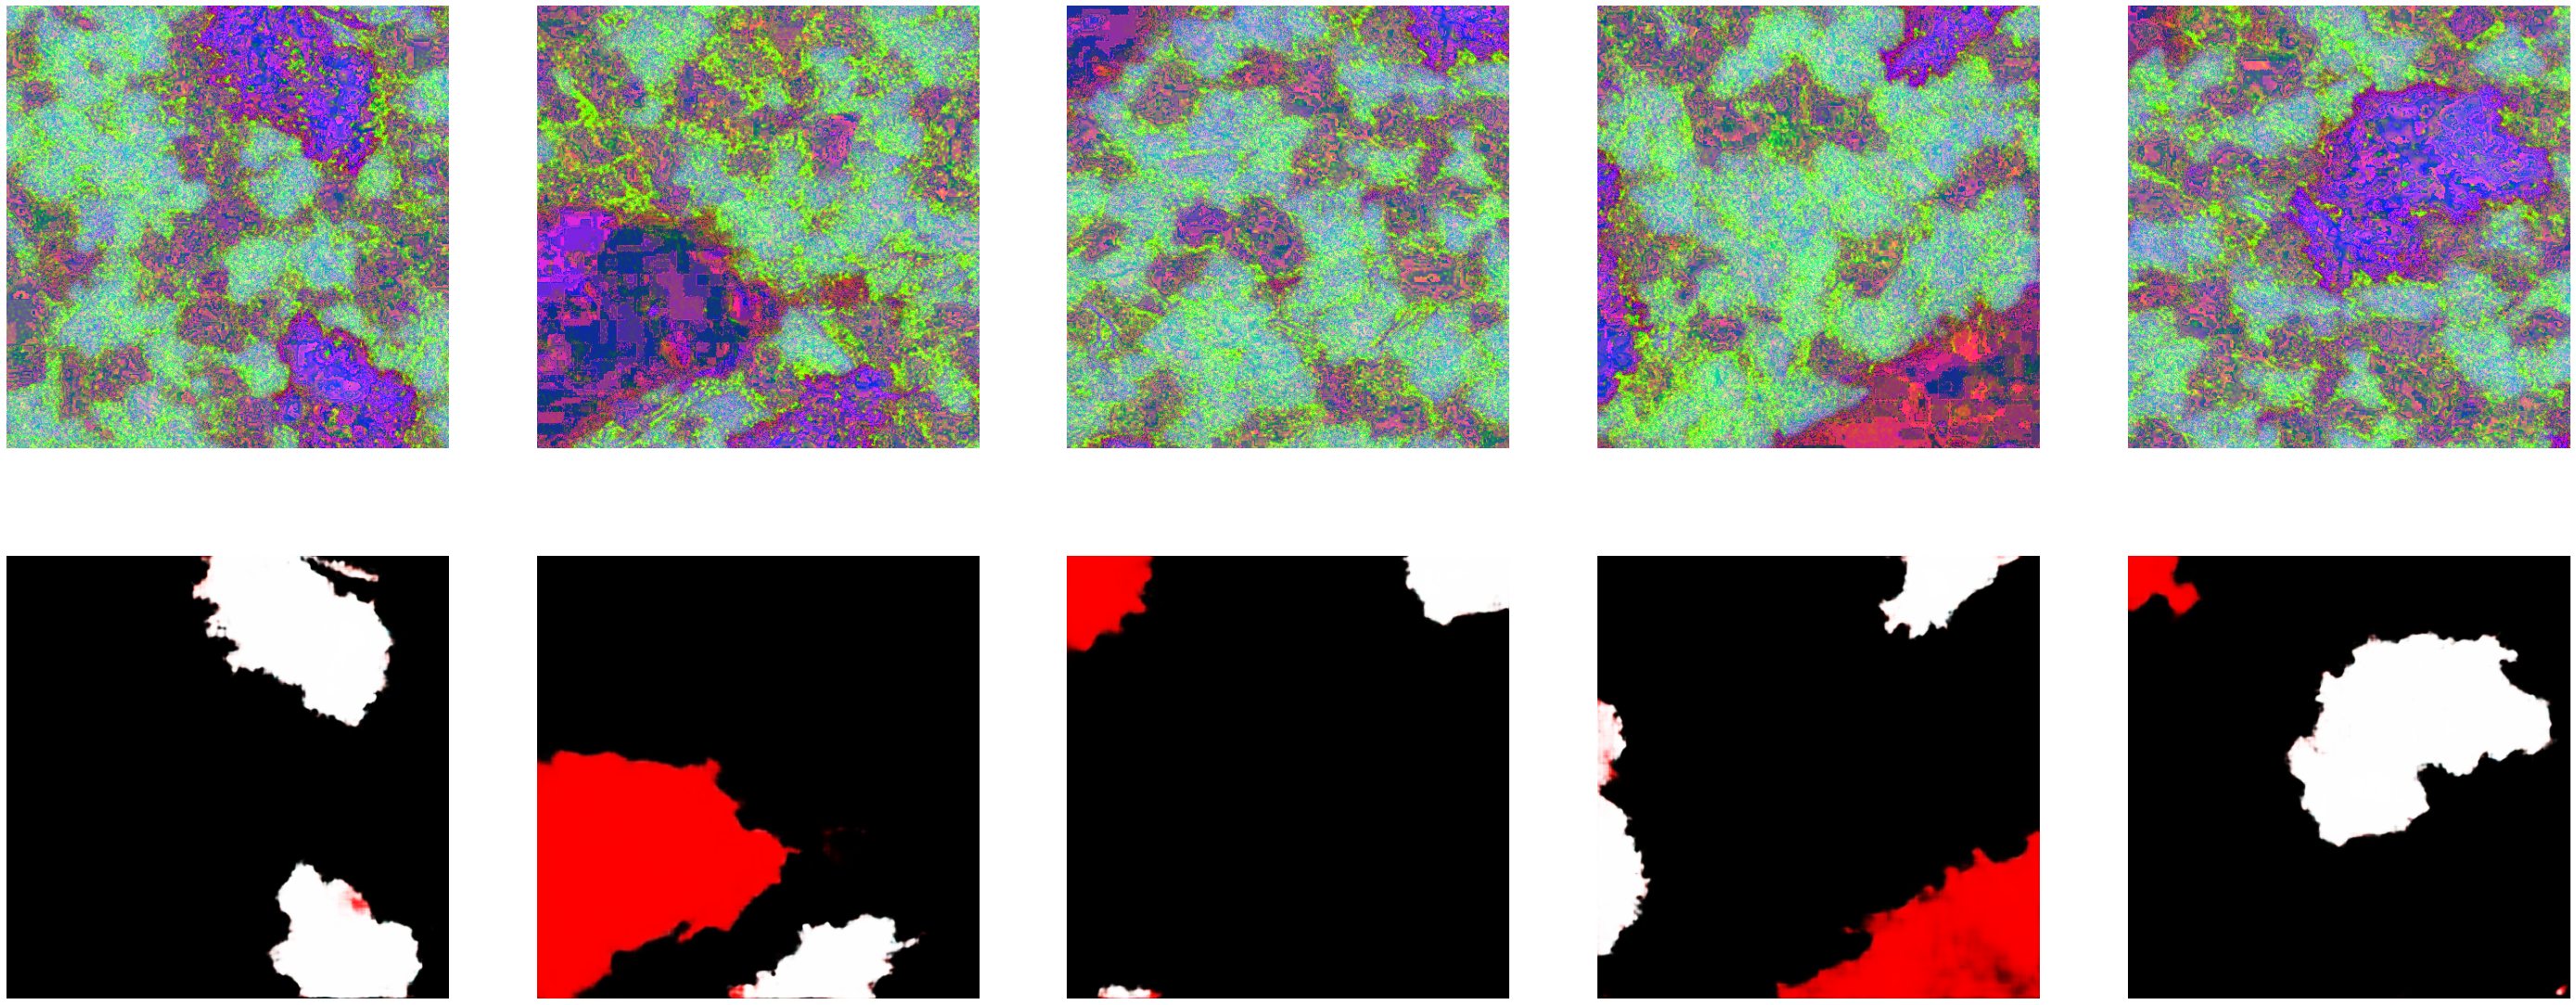

In [7]:
#학습할 모델 지정.
#CPU 사용
import tensorflow as tf

tf.debugging.set_log_device_placement(False)

with tf.device('/CPU:0'):
    model_path= 'model/test (528).hdf5'#모델 경로 설정
    load_model = sr.test_model(model_path, X_test)

['C:\\Users\\82106\\tf24\\data\\test\\0-0.png', 'C:\\Users\\82106\\tf24\\data\\test\\0-1024.png', 'C:\\Users\\82106\\tf24\\data\\test\\0-1088.png', 'C:\\Users\\82106\\tf24\\data\\test\\0-1152.png', 'C:\\Users\\82106\\tf24\\data\\test\\0-1216.png', 'C:\\Users\\82106\\tf24\\data\\test\\0-128.png', 'C:\\Users\\82106\\tf24\\data\\test\\0-1280.png', 'C:\\Users\\82106\\tf24\\data\\test\\0-1344.png', 'C:\\Users\\82106\\tf24\\data\\test\\0-1408.png', 'C:\\Users\\82106\\tf24\\data\\test\\0-1472.png']
end
['C:\\Users\\82106\\tf24\\data\\test\\0-0.png', 'C:\\Users\\82106\\tf24\\data\\test\\0-64.png', 'C:\\Users\\82106\\tf24\\data\\test\\0-128.png', 'C:\\Users\\82106\\tf24\\data\\test\\0-192.png', 'C:\\Users\\82106\\tf24\\data\\test\\0-256.png', 'C:\\Users\\82106\\tf24\\data\\test\\0-320.png', 'C:\\Users\\82106\\tf24\\data\\test\\0-384.png', 'C:\\Users\\82106\\tf24\\data\\test\\0-448.png', 'C:\\Users\\82106\\tf24\\data\\test\\0-512.png', 'C:\\Users\\82106\\tf24\\data\\test\\0-576.png']


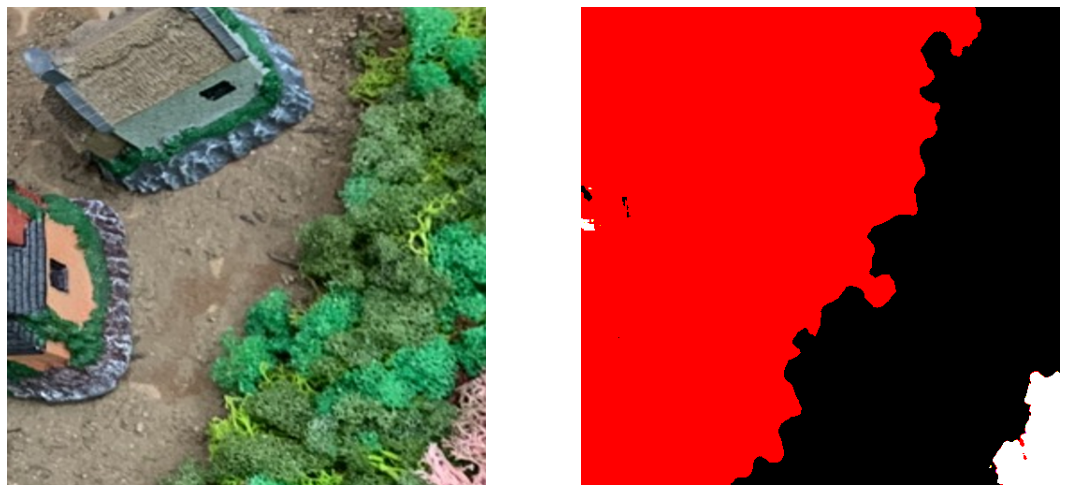

In [8]:
#입력모델, 이미지순서, 훈련데이터
img= sr.display_mask_test(load_model,0,X_test)

In [9]:
for i in range(0, 125):
    img = sr.display_mask_save(load_model, i)

In [18]:
#img= sr.display_mask(load_model,12)